In [10]:
import numpy as np
import matplotlib.pyplot as plt

size = 100_000

In [11]:
# =============================================================================
# LCG
# =============================================================================
class LinearCongruentialGenerator:
    def __init__(self, multiplier: int, modulus: int, seed: int) -> None:
        self.a = multiplier
        self.m = modulus
        self.x = seed

    def random(self):
        self.x = (self.a * self.x) % self.m
        return self.x


def correlation(x, y):
    return np.corrcoef(x, y)[0,1]


prng = LinearCongruentialGenerator(15, 29, 17)
sample = np.array([prng.random() for _ in range(29 - 1)])

print(f"""
Erwartungswert: {sample.mean()}
Varianz:        {sample.var()}

Autocorrelationen
Lag 1: {correlation(sample, np.roll(sample, 1))}
Lag 2: {correlation(sample, np.roll(sample, 2))}
Lag 3: {correlation(sample, np.roll(sample, 3))}
""")


Erwartungswert: 14.5
Varianz:        65.25

Autocorrelationen
Lag 1: 0.4444444444444444
Lag 2: 0.1111111111111111
Lag 3: 0.06349206349206349



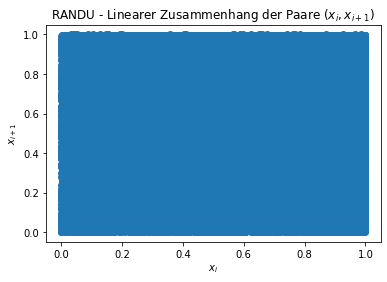

In [12]:
# =============================================================================
# RANDU
# =============================================================================
NORM = (1 << 31)  # konstante zur Normalisierung
randu = LinearCongruentialGenerator(65539, 1 << 31, 1)
sample = np.array([randu.random() / NORM for _ in range(size)])

# =============================================================================
# RANDU 2D
# =============================================================================
plt.title("RANDU - Linearer Zusammenhang der Paare $(x_i, x_{i+1})$")
plt.xlabel("$x_i$")
plt.ylabel("$x_{i+1}$")

plt.scatter(sample, np.roll(sample, 1))
plt.show()

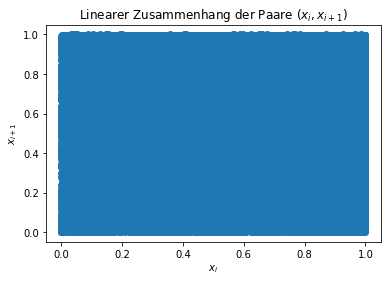

In [13]:
# =============================================================================
# Beispiel 2D
# =============================================================================
plt.title("Linearer Zusammenhang der Paare $(x_i, x_{i+1})$")
plt.xlabel("$x_i$")
plt.ylabel("$x_{i+1}$")

plt.scatter(sample, np.roll(sample, 1))
plt.show()

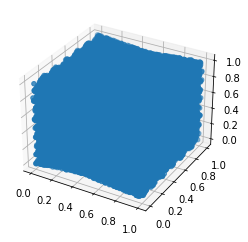

In [14]:
# =============================================================================
# RANDU 3D
# =============================================================================
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample, np.roll(sample, 1), np.roll(sample, 2))
plt.show()

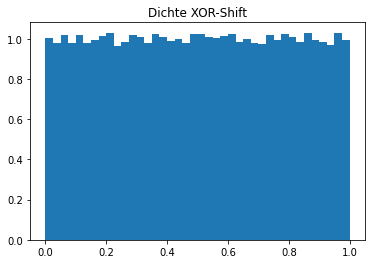

In [15]:
# ============================================================================
# XORShift
# ============================================================================
class XORShift:
    def __init__(self, seed:int) -> None:
        self.x = np.uint32(seed)

    def random(self):
        self.x ^= self.x << np.uint32(13)
        self.x ^= self.x >> np.uint32(17)
        self.x ^= self.x << np.uint32(5)

        return self.x

prng = XORShift(12541)
MAX_Value = 1 << 32
sample = np.array([prng.random() / MAX_Value for _ in range(size)])

# =============================================================================
# Dichte - XORShift
# =============================================================================
plt.title("Dichte XOR-Shift")
plt.hist(sample, density=True, bins=40)
plt.show()

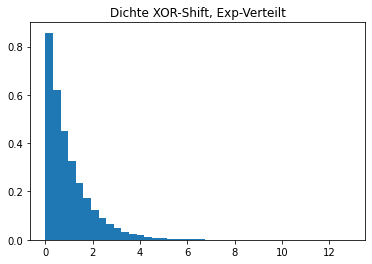

In [16]:
# =============================================================================
# Transformation - Exponentialverteilt
# =============================================================================
plt.title("Dichte XOR-Shift, Exp-Verteilt")
plt.hist(-np.log(sample), density=True, bins=40)
plt.show()

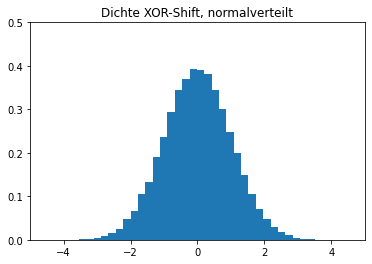

In [17]:
# =============================================================================
# Transformation - Normalverteilung
# =============================================================================
sample_1 = sample[::2]
sample_2 = sample[1::2]

normal = np.sqrt(-2 * np.log(sample_1)) * np.cos(2 * np.pi * sample_2)

plt.title("Dichte XOR-Shift, normalverteilt")
plt.xlim(-5, 5)
plt.ylim(0, 0.5)
plt.hist(normal, density=True, bins=40)
plt.show()